## CSCS530 Winter 2016
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2016)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2016
  * Schedule: Wednesdays and Friday, 1:00-2:30PM ET
  * Location: 120 West Hall (http://www.lsa.umich.edu/cscs/research/computerlab)
  * Teachers: [Mike Bommarito](https://www.linkedin.com/in/bommarito) and [Sarah Cherng](https://www.linkedin.com/pub/sarah-cherng/35/1b7/316)

In [1]:
%matplotlib inline

# Imports
import networkx as nx
import numpy
import matplotlib.pyplot as plt
import pandas

import seaborn; seaborn.set()
seaborn.set_style("darkgrid")

# Import widget methods
from IPython.html.widgets import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Graph construction

Let's start by demonstrating how to manually create a deterministic graph.  We'll learn how to add individual nodes and edges.

In [2]:
g = nx.Graph()
print((g.number_of_nodes(), g.number_of_edges()))

(0, 0)


In [3]:
g.add_node("alice")
print((g.number_of_nodes(), g.number_of_edges()))

(1, 0)


In [4]:
g.add_node("bob")
print((g.number_of_nodes(), g.number_of_edges()))

(2, 0)


In [5]:
g.add_edge("alice", "bob")
print((g.number_of_nodes(), g.number_of_edges()))

(2, 1)


/data/workspace/env/local/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/data/workspace/env/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


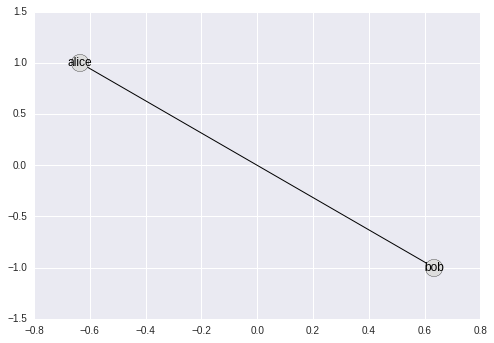

In [6]:
# Draw the random graph
g_layout = nx.spring_layout(g, iterations=1000)
nx.draw_networkx(g, pos=g_layout, node_color='#dddddd')

# Random graph construction

Next, let's simulate our own growing graph.  We'll use the following procedure:
  * each time step, sample a number of nodes to add
  * for each node to add, sample a random set of edges to add

In [22]:
# Create a new graph
g = nx.Graph()
num_steps = 10
prob_triad = 0.1

# Iterate through time
for t in range(num_steps):
    # Draw a random number of nodes to add
    num_nodes_add = numpy.random.binomial(10, 0.25)
    num_edges_add = 0
    
    for i in range(g.number_of_nodes(), g.number_of_nodes() + num_nodes_add):
        print("adding node {0} at time step {1}".format(i, t))
        g.add_node(i)
        
        if i > 0:
            print("adding edge from {0} to {1} at time step {2}".format(i, i-1, t))
            g.add_edge(i, i-1)
            
        if i > 3:
            if numpy.random.random() < prob_triad:
                print("adding edge from {0} to {1} at time step {2}".format(i, i-1, t))
                g.add_edge(i, i-4)
    
    print((num_nodes_add, num_edges_add))    

adding node 0 at time step 0
adding node 1 at time step 0
adding edge from 1 to 0 at time step 0
adding node 2 at time step 0
adding edge from 2 to 1 at time step 0
(3, 0)
adding node 3 at time step 1
adding edge from 3 to 2 at time step 1
adding node 4 at time step 1
adding edge from 4 to 3 at time step 1
adding edge from 4 to 3 at time step 1
(2, 0)
adding node 5 at time step 2
adding edge from 5 to 4 at time step 2
adding node 6 at time step 2
adding edge from 6 to 5 at time step 2
(2, 0)
adding node 7 at time step 3
adding edge from 7 to 6 at time step 3
(1, 0)
adding node 8 at time step 4
adding edge from 8 to 7 at time step 4
adding node 9 at time step 4
adding edge from 9 to 8 at time step 4
adding edge from 9 to 8 at time step 4
(2, 0)
adding node 10 at time step 5
adding edge from 10 to 9 at time step 5
adding node 11 at time step 5
adding edge from 11 to 10 at time step 5
adding node 12 at time step 5
adding edge from 12 to 11 at time step 5
adding node 13 at time step 5
addi

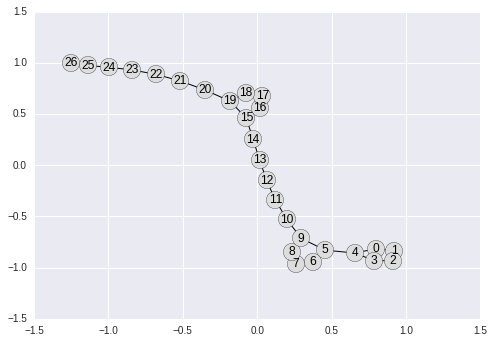

In [23]:
# Draw the random graph
g_layout = nx.spring_layout(g, iterations=100)
nx.draw_networkx(g, pos=g_layout, node_color='#dddddd')

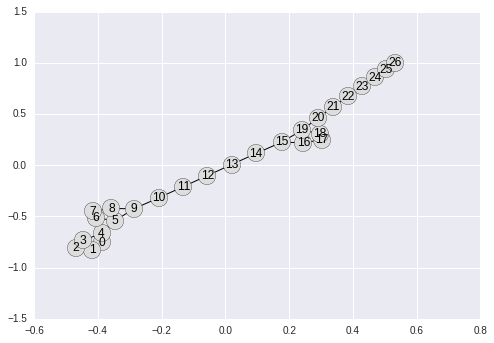

In [24]:
# Get the giant component
giant_component = g.subgraph(sorted(nx.connected_components(g), key = len, reverse=True)[0])

# Draw the giant component
g_layout = nx.spring_layout(giant_component, iterations=1000)
nx.draw_networkx(giant_component, pos=g_layout, node_color='#dddddd')

(0, 7, 3)
(1, 13, 13)
(2, 19, 20)
(3, 21, 25)
(4, 27, 38)
(5, 31, 53)
(6, 35, 67)
(7, 42, 89)
(8, 50, 125)
(9, 55, 161)


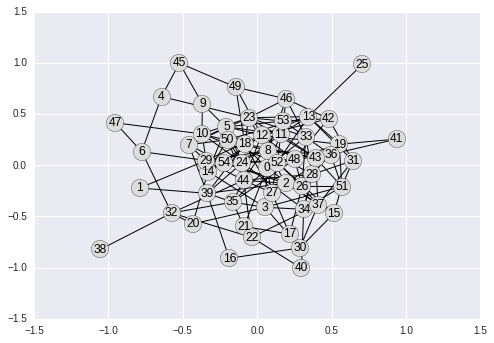

In [32]:
# Create a new graph
g = nx.Graph()
num_steps = 10
prob_triad = 1.0
num_node_n = 10
num_node_p = 0.5
num_edge_p = 0.1

# Iterate through time
for t in range(num_steps):
    # Draw a random number of nodes to add
    num_nodes_add = numpy.random.binomial(n=num_node_n, p=num_node_p)
    
    for i in range(g.number_of_nodes(), g.number_of_nodes() + num_nodes_add):
        # Add the new node
        g.add_node(i)
        
        # Determine number of edges to sample
        num_edges_add = numpy.random.binomial(n=g.number_of_nodes(), p=num_edge_p)
        target_nodes = numpy.random.choice(g.nodes(), size=num_edges_add)
        
        for target_node in target_nodes:
            g.add_edge(i, target_node)
            
    print(((t, g.number_of_nodes(), g.number_of_edges())))
    
# Draw the random graph
g_layout = nx.spring_layout(g, iterations=100)
nx.draw_networkx(g, pos=g_layout, node_color='#dddddd')

1


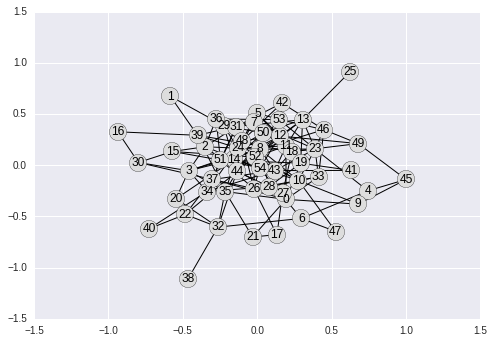

In [34]:
print(len(list(nx.connected_components(g))))

# Get the giant component
giant_component = g.subgraph(sorted(nx.connected_components(g), key = len, reverse=True)[0])

# Draw the giant component
g_layout = nx.spring_layout(giant_component, iterations=1000)
nx.draw_networkx(giant_component, pos=g_layout, node_color='#dddddd')